In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [12]:
X,y=make_blobs(n_samples=2000,n_features=2,cluster_std=3,centers=3,random_state=42)
n_features=X.shape[1]
m=X.shape[0]
print(X.shape,y.shape)
print(np.unique(y));

(2000, 2) (2000,)
[0 1 2]


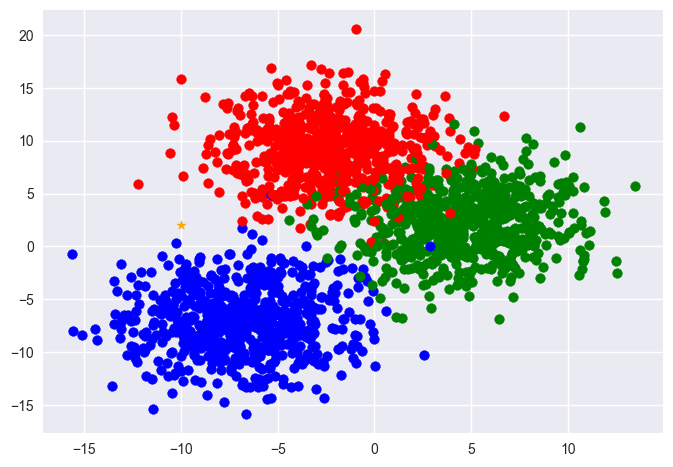

In [18]:
# point to classify
xt=np.array([-10,2]);
for i in range(m):
    if y[i]==0:
        plt.scatter(X[i,0],X[i,1],c='r',label="red")
    elif y[i]==1: 
        plt.scatter(X[i,0],X[i,1],c="g",label='green')
    else:
        plt.scatter(X[i,0],X[i,1],c="b",label='blue')
    
plt.scatter(xt[0],xt[1],c='orange',marker='*');
plt.show()

In [30]:
def distance(p,q):
    # euclidean distance from xt to X[i]
    return np.sqrt(np.sum((p-q)**2))

def knn(X,y,xt,k=5):

    m=X.shape[0];
    # find distance of xt from all points in X
    dlist=[];
    for i in range(m):
        d=distance(X[i],xt)
        dlist.append((d,y[i]))
    # sort dlist
    dlist=sorted(dlist)
    dlist=np.array(dlist[:k])
    labels=dlist[:,1]

    labels,cnts=np.unique(labels,return_counts=True)
    # print(labels,cnts)
    idx=cnts.argmax()
    pred=labels[idx]
    return int(pred);



In [36]:
knn(X,y,[0,0])

1

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
model.predict([[0,0]])

array([1])